In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import datetime

In [3]:

# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy data
# Assumptions:
# - 3 Zones: Zona A, Zona B, Zona C
# - Each zone has 5 agencies
# - Dates: Last 30 days from today (November 13, 2025)
# - For each date, zone, agency: random number of assistants (3-10)
# - For each date, agency: multiple operations (10-50 per day), each with type and cantidad=1 (then sum for total)

zones = ['Zona A', 'Zona B', 'Zona C']
agencias_per_zone = {
    'Zona A': ['Agencia A1', 'Agencia A2', 'Agencia A3', 'Agencia A4', 'Agencia A5'],
    'Zona B': ['Agencia B1', 'Agencia B2', 'Agencia B3', 'Agencia B4', 'Agencia B5'],
    'Zona C': ['Agencia C1', 'Agencia C2', 'Agencia C3', 'Agencia C4', 'Agencia C5']
}

tipos_operaciones = ['Tipo1', 'Tipo2', 'Tipo3', 'Tipo4']

# Dates
start_date = datetime.date(2025, 10, 14)  # 30 days before Nov 13, 2025
dates = [start_date + datetime.timedelta(days=i) for i in range(30)]

# Generate data
data = []
for date in dates:
    for zona in zones:
        for agencia in agencias_per_zone[zona]:
            # Number of assistants for this agency on this day: random 3-10
            num_auxiliares = np.random.randint(3, 11)
            # Assistants IDs dummy: Aux1 to AuxN
            auxiliares = [f'Aux_{agencia}_{i+1}' for i in range(num_auxiliares)]
            
            # Number of operations this day: random 10-50
            num_ops = np.random.randint(10, 51)
            for _ in range(num_ops):
                auxiliar = np.random.choice(auxiliares)
                tipo = np.random.choice(tipos_operaciones)
                data.append({
                    'fecha': date,
                    'Zona': zona,
                    'Agencia': agencia,
                    'Auxiliar': auxiliar,
                    'tipo_operaciones': tipo,
                    'cantidad_operaciones': 1  # Each row is one operation
                })

df = pd.DataFrame(data)
df

,fecha,Zona,Agencia,Auxiliar,tipo_operaciones,cantidad_operaciones
0,2025-10-14,Zona A,Agencia A1,Aux_Agencia A1_8,Tipo1,1
1,2025-10-14,Zona A,Agencia A1,Aux_Agencia A1_5,Tipo3,1
2,2025-10-14,Zona A,Agencia A1,Aux_Agencia A1_3,Tipo3,1
3,2025-10-14,Zona A,Agencia A1,Aux_Agencia A1_8,Tipo1,1
4,2025-10-14,Zona A,Agencia A1,Aux_Agencia A1_4,Tipo4,1
...,...,...,...,...,...,...
13895,2025-11-12,Zona C,Agencia C5,Aux_Agencia C5_1,Tipo3,1
13896,2025-11-12,Zona C,Agencia C5,Aux_Agencia C5_4,Tipo2,1
13897,2025-11-12,Zona C,Agencia C5,Aux_Agencia C5_4,Tipo2,1
13898,2025-11-12,Zona C,Agencia C5,Aux_Agencia C5_4,Tipo1,1


In [11]:
# Aggregated data per day, zona, agencia
agg_df = df.groupby(['fecha', 'Zona', 'Agencia']).agg(
    cantidad_total=pd.NamedAgg(column='cantidad_operaciones', aggfunc='sum'),
    num_auxiliares=pd.NamedAgg(column='Auxiliar', aggfunc='nunique'),
    tipos_unicos=pd.NamedAgg(column='tipo_operaciones', aggfunc=lambda x: ', '.join(x.unique()))
).reset_index()

agg_df

,fecha,Zona,Agencia,cantidad_total,num_auxiliares,tipos_unicos
0,2025-10-14,Zona A,Agencia A1,38,9,"Tipo1, Tipo3, Tipo4, Tipo2"
1,2025-10-14,Zona A,Agencia A2,30,8,"Tipo3, Tipo4, Tipo1, Tipo2"
2,2025-10-14,Zona A,Agencia A3,48,10,"Tipo4, Tipo2, Tipo3, Tipo1"
3,2025-10-14,Zona A,Agencia A4,20,6,"Tipo4, Tipo1, Tipo2, Tipo3"
4,2025-10-14,Zona A,Agencia A5,44,4,"Tipo4, Tipo2, Tipo1, Tipo3"
...,...,...,...,...,...,...
445,2025-11-12,Zona C,Agencia C1,40,6,"Tipo1, Tipo2, Tipo4, Tipo3"
446,2025-11-12,Zona C,Agencia C2,43,5,"Tipo4, Tipo3, Tipo2, Tipo1"
447,2025-11-12,Zona C,Agencia C3,43,8,"Tipo4, Tipo2, Tipo3, Tipo1"
448,2025-11-12,Zona C,Agencia C4,48,5,"Tipo3, Tipo2, Tipo4, Tipo1"


In [13]:
# Efficiency: operations per assistant
agg_df['eficiencia'] = agg_df['cantidad_total'] / agg_df['num_auxiliares']
agg_df

,fecha,Zona,Agencia,cantidad_total,num_auxiliares,tipos_unicos,eficiencia
0,2025-10-14,Zona A,Agencia A1,38,9,"Tipo1, Tipo3, Tipo4, Tipo2",4.222222
1,2025-10-14,Zona A,Agencia A2,30,8,"Tipo3, Tipo4, Tipo1, Tipo2",3.750000
2,2025-10-14,Zona A,Agencia A3,48,10,"Tipo4, Tipo2, Tipo3, Tipo1",4.800000
3,2025-10-14,Zona A,Agencia A4,20,6,"Tipo4, Tipo1, Tipo2, Tipo3",3.333333
4,2025-10-14,Zona A,Agencia A5,44,4,"Tipo4, Tipo2, Tipo1, Tipo3",11.000000
...,...,...,...,...,...,...,...
445,2025-11-12,Zona C,Agencia C1,40,6,"Tipo1, Tipo2, Tipo4, Tipo3",6.666667
446,2025-11-12,Zona C,Agencia C2,43,5,"Tipo4, Tipo3, Tipo2, Tipo1",8.600000
447,2025-11-12,Zona C,Agencia C3,43,8,"Tipo4, Tipo2, Tipo3, Tipo1",5.375000
448,2025-11-12,Zona C,Agencia C4,48,5,"Tipo3, Tipo2, Tipo4, Tipo1",9.600000


In [15]:
# Zona summary
zona_summary = agg_df.groupby('Zona').agg(
    total_operaciones=pd.NamedAgg('cantidad_total', 'sum'),
    avg_auxiliares=pd.NamedAgg('num_auxiliares', 'mean'),
    avg_eficiencia=pd.NamedAgg('eficiencia', 'mean')
).reset_index()
zona_summary

,Zona,total_operaciones,avg_auxiliares,avg_eficiencia
0,Zona A,4732,6.400000,5.598442
1,Zona B,4804,6.293333,5.829759
2,Zona C,4364,6.193333,5.353042


In [17]:
# Agencia summary
agencia_summary = agg_df.groupby('Agencia').agg(
    total_operaciones=pd.NamedAgg('cantidad_total', 'sum'),
    avg_auxiliares=pd.NamedAgg('num_auxiliares', 'mean'),
    avg_eficiencia=pd.NamedAgg('eficiencia', 'mean')
).reset_index()
agencia_summary

,Agencia,total_operaciones,avg_auxiliares,avg_eficiencia
0,Agencia A1,982,6.733333,5.287751
1,Agencia A2,1011,5.533333,7.296772
2,Agencia A3,949,7.133333,4.742209
3,Agencia A4,888,6.166667,5.368016
4,Agencia A5,902,6.433333,5.297460
5,Agencia B1,1009,7.233333,5.231376
6,Agencia B2,897,5.866667,5.833743
7,Agencia B3,930,5.866667,5.833770
8,Agencia B4,914,6.466667,5.516984
9,Agencia B5,1054,6.033333,6.732923


In [7]:
time_series = agg_df.groupby('fecha')['cantidad_total'].sum().reset_index()
time_series

,fecha,cantidad_total
0,2025-10-14,479
1,2025-10-15,357
2,2025-10-16,420
3,2025-10-17,474
4,2025-10-18,505
5,2025-10-19,484
6,2025-10-20,517
7,2025-10-21,482
8,2025-10-22,498
9,2025-10-23,353


In [9]:
tipos_dist = df['tipo_operaciones'].value_counts(normalize=True) * 100

tipos_dist

tipo_operaciones
Tipo4    25.309353
Tipo1    25.280576
Tipo2    24.985612
Tipo3    24.424460
Name: proportion, dtype: float64

<Axes: title={'center': 'Operaciones por Zona'}, xlabel='Zona'>

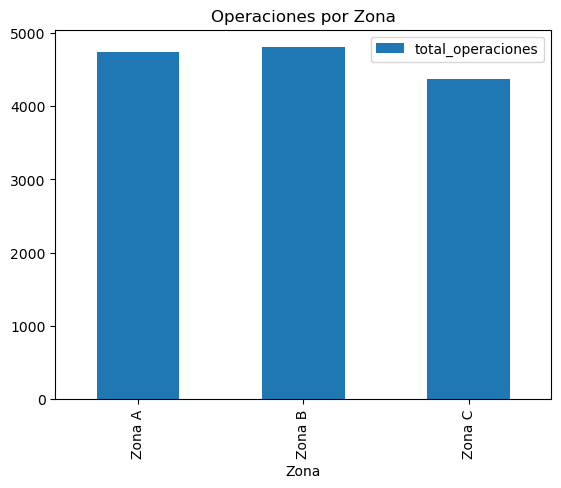

In [18]:
zona_summary.plot(kind='bar', x='Zona', y='total_operaciones', title='Operaciones por Zona')  



<Axes: title={'center': 'Tendencia de Operaciones'}, xlabel='fecha'>

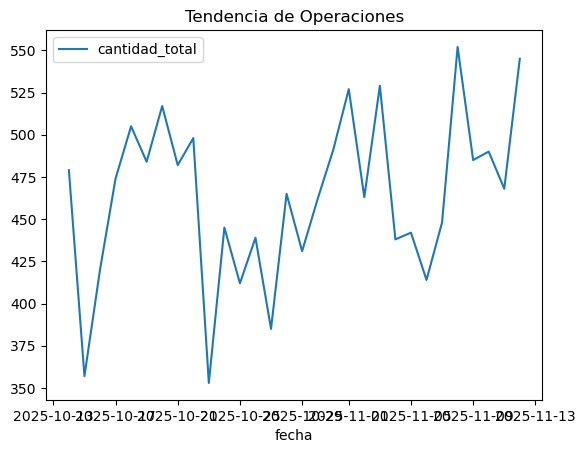

In [19]:
time_series.plot(kind='line', x='fecha', y='cantidad_total', title='Tendencia de Operaciones')  



<Axes: title={'center': 'Distribución de Tipos'}, ylabel='proportion'>

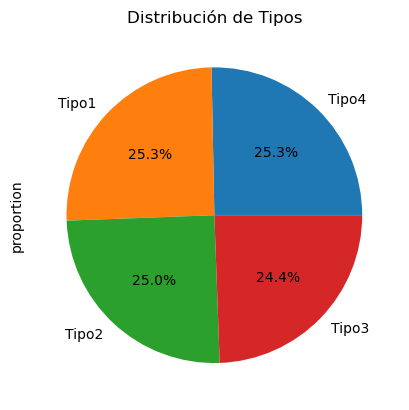

In [20]:
tipos_dist.plot(kind='pie', autopct='%1.1f%%', title='Distribución de Tipos')  



In [21]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generar datos dummies - Solo operaciones de ventanilla, con reducción progresiva
np.random.seed(42)

zonas = ['Norte', 'Sur', 'Este', 'Oeste']

agencias = {
    'Norte': ['Agencia_N1', 'Agencia_N2', 'Agencia_N3'],
    'Sur': ['Agencia_S1', 'Agencia_S2', 'Agencia_S3', 'Agencia_S4'],
    'Este': ['Agencia_E1', 'Agencia_E2', 'Agencia_E3'],
    'Oeste': ['Agencia_O1', 'Agencia_O2', 'Agencia_O3', 'Agencia_O4']
}

start_date = datetime(2024, 11, 1)
dates = [start_date + timedelta(days=30*i) for i in range(12)]

data = []
for zona in zonas:
    for agencia in agencias[zona]:
        for date in dates:
            auxiliares = np.random.randint(5, 15)
            base_ops = 1000
            month_index = (date - start_date).days // 30
            trend_factor = 0.9 ** month_index  # Reducción 10% mensual debido a migración digital
            cantidad = int(base_ops * trend_factor * np.random.uniform(0.8, 1.2))
            data.append({
                'fecha': date.strftime('%Y-%m-%d'),
                'zona': zona,
                'agencia': agencia,
                'auxiliares': auxiliares,
                'cantidad_operaciones': max(0, cantidad),
                'tipo_operaciones': 'Ventanilla'
            })

df = pd.DataFrame(data)



In [23]:
# Análisis

# 1. Total operaciones por zona
total_por_zona = df.groupby('zona')['cantidad_operaciones'].sum().reset_index()
total_por_zona


,zona,cantidad_operaciones
0,Este,22339
1,Norte,20976
2,Oeste,28739
3,Sur,28226


In [25]:

# 2. Tendencia temporal
df['fecha'] = pd.to_datetime(df['fecha'])
tendencia = df.groupby('fecha')['cantidad_operaciones'].sum().reset_index()
tendencia

,fecha,cantidad_operaciones
0,2024-11-01,13383
1,2024-12-01,12981
2,2024-12-31,11893
3,2025-01-30,10409
4,2025-03-01,8882
5,2025-03-31,8485
6,2025-04-30,7232
7,2025-05-30,6632
8,2025-06-29,5867
9,2025-07-29,5537


In [27]:

# 3. Eficiencia: Operaciones por auxiliar por agencia
eficiencia = df.groupby('agencia').agg({
    'cantidad_operaciones': 'sum',
    'auxiliares': 'mean'
})
eficiencia['ops_por_auxiliar'] = eficiencia['cantidad_operaciones'] / eficiencia['auxiliares']

eficiencia

,cantidad_operaciones,auxiliares,ops_por_auxiliar
agencia,,,
Agencia_E1,7376,9.000000,819.555556
Agencia_E2,7515,10.000000,751.500000
Agencia_E3,7448,8.583333,867.728155
Agencia_N1,7062,11.416667,618.569343
Agencia_N2,6804,10.166667,669.245902
Agencia_N3,7110,8.916667,797.383178
Agencia_O1,7159,7.916667,904.294737
Agencia_O2,7265,8.000000,908.125000
Agencia_O3,7328,9.166667,799.418182


In [29]:


# 4. Promedio auxiliares y operaciones por zona
promedio_por_zona = df.groupby('zona').agg({
    'auxiliares': 'mean',
    'cantidad_operaciones': 'mean'
}).round(2)

promedio_por_zona

,auxiliares,cantidad_operaciones
zona,,
Este,9.19,620.53
Norte,10.17,582.67
Oeste,8.62,598.73
Sur,10.04,588.04


In [30]:


# Variación: Proyección futura con mayor reducción (20%)
df_future = df.copy()
df_future['fecha'] = df_future['fecha'] + pd.DateOffset(months=6)
for i in range(len(df_future)):
    df_future.at[i, 'cantidad_operaciones'] *= 0.8  # Mayor reducción

tendencia_future = df_future.groupby('fecha')['cantidad_operaciones'].sum().reset_index()
tendencia_future


/tmp/ipykernel_65579/1248098862.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '894.4000000000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_future.at[i, 'cantidad_operaciones'] *= 0.8  # Mayor reducción


,fecha,cantidad_operaciones
0,2025-05-01,10706.4
1,2025-06-01,10384.8
2,2025-06-30,9514.4
3,2025-07-30,8327.2
4,2025-09-01,7105.6
5,2025-09-30,6788.0
6,2025-10-30,5785.6
7,2025-11-30,5305.6
8,2025-12-29,4693.6
9,2026-01-29,4429.6


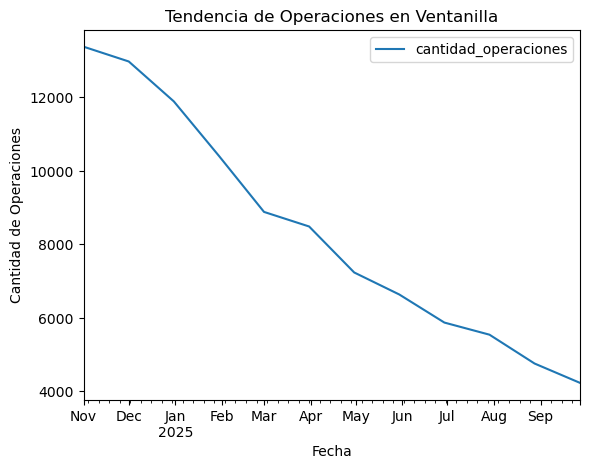

In [32]:

import matplotlib.pyplot as plt
tendencia.plot(x='fecha', y='cantidad_operaciones', kind='line', title='Tendencia de Operaciones en Ventanilla')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Operaciones')
plt.show()  # Línea descendente mostrando reducción.

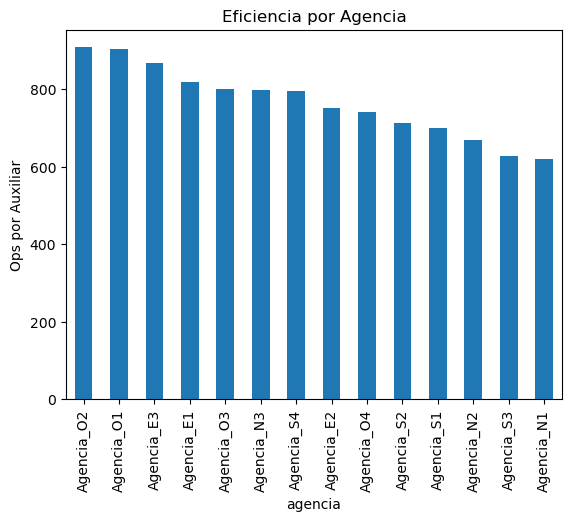

In [ ]:
eficiencia['ops_por_auxiliar'].sort_values(ascending=False).plot(kind='bar', title='Eficiencia por Agencia')
plt.ylabel('Ops por Auxiliar')
plt.show()  # Barras para comparar agencias.